<a href="https://colab.research.google.com/github/muhammadhafiz27/Deep-Learning/blob/main/Convolutional_Neural_Network_(CNN)_untuk_Klasifikasi_Citra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import time

# **Load dataset dan transformasi**

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True)
testloader = DataLoader(testset, batch_size=64, shuffle=False)


# **Definisikan model CNN**

In [3]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# **Inisialisasi model, loss, optimizer**

In [4]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# **Training**

In [5]:
epochs = 5
train_loss = []
start_time = time.time()
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_loss.append(running_loss/len(trainloader))
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(trainloader):.4f}')

end_time = time.time()
training_time = end_time - start_time
print(f'\nTraining Time: {training_time:.4f} seconds')

Epoch [1/5], Loss: 0.1895
Epoch [2/5], Loss: 0.0513
Epoch [3/5], Loss: 0.0372
Epoch [4/5], Loss: 0.0278
Epoch [5/5], Loss: 0.0216

Training Time: 238.1312 seconds


# **Evaluasi**

In [6]:
correct, total = 0, 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Akurasi Uji: {100 * correct / total:.2f}%')

Akurasi Uji: 98.96%


# **Plot grafik loss**

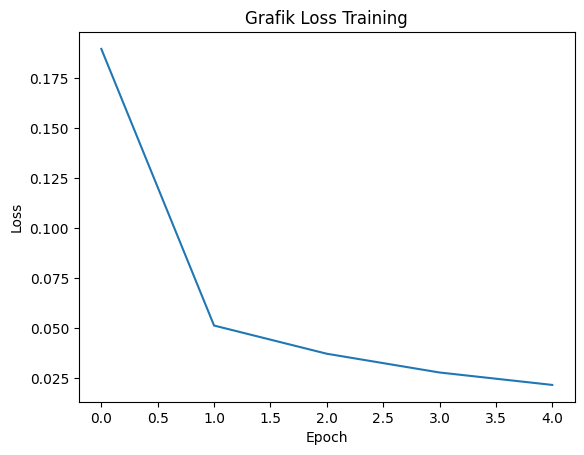

In [7]:
plt.plot(train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Grafik Loss Training')
plt.show()

# **Visualisasi Contoh Citra dan Prediksi**

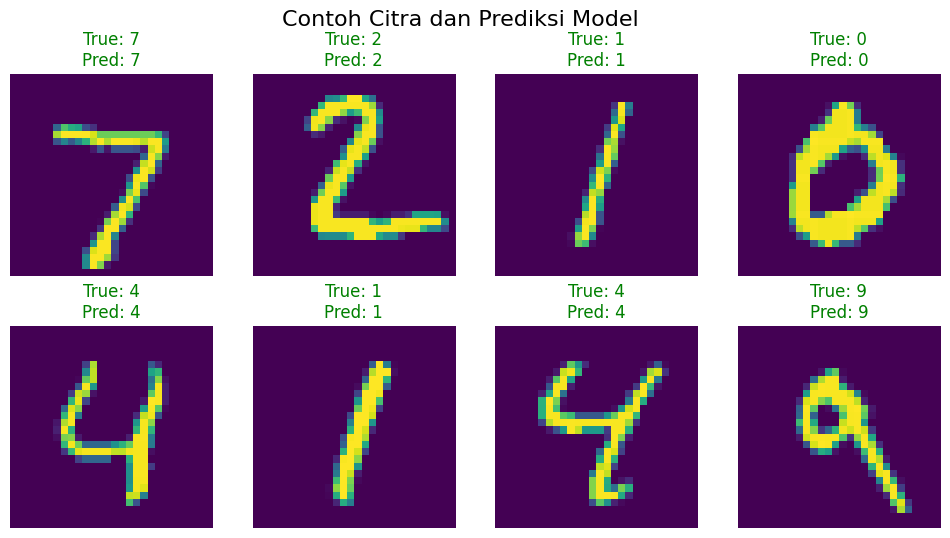

In [8]:
# Ambil satu batch dari data uji
dataiter = iter(testloader)
images, labels = next(dataiter)

# Lakukan prediksi
with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Fungsi untuk menampilkan citra
def imshow(img):
    img = img / 2 + 0.5  # Un-normalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

import numpy as np # Import numpy yang dibutuhkan untuk imshow

fig = plt.figure(figsize=(12, 6))

# Tampilkan 8 citra pertama
for i in range(8):
    ax = fig.add_subplot(2, 4, i + 1, xticks=[], yticks=[])
    imshow(images[i])
    ax.set_title(f"True: {labels[i].item()}\nPred: {predicted[i].item()}",
                 color=("green" if predicted[i] == labels[i] else "red"))

plt.suptitle("Contoh Citra dan Prediksi Model", fontsize=16)
plt.show()